# Import the data set

Using pandas to import the data, here we're importing the Cho and Iyer data sets.

In [1]:
import pandas as pd

cho_raw_df = pd.read_csv('./data/cho.txt', sep='\t', header=None)
iyer_raw_df = pd.read_csv('./data/iyer.txt', sep='\t', header=None)

# Data Preprocessing

Print the outliers percentage in the data set.

In [2]:
iyer_outliers = iyer_raw_df[iyer_raw_df[1] == -1]

print(f'Percentage of outliers in Iyer dataset is {iyer_outliers.shape[0] * 100 / iyer_raw_df.shape[0]} %')

Percentage of outliers in Iyer dataset is 6.382978723404255 %


Remove outliers and extract labels

In [3]:
iyer_cleaned_df = iyer_raw_df[iyer_raw_df[1] != -1]

cho_labels = cho_raw_df.iloc[:, 1]
cho_df = cho_raw_df.iloc[:, 2:]
print(f'Number of distinct labels in Cho dataset is {cho_labels.nunique()}')
iyer_labels = iyer_cleaned_df.iloc[:, 1]
iyer_df = iyer_cleaned_df.iloc[:, 1:]
print(f'Number of distinct labels in Iyer dataset is {iyer_labels.nunique()}')

Number of distinct labels in Cho dataset is 5
Number of distinct labels in Iyer dataset is 10


# K-Means: Cho data set

Vizualize the data set distribution range

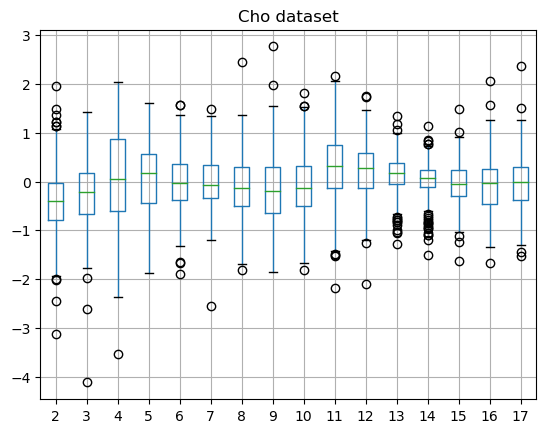

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
cho_df.boxplot()
plt.title('Cho dataset')
plt.figure()
plt.show()


Perform K-Means on the Cho data set and visualize the results with the ground truth labels.

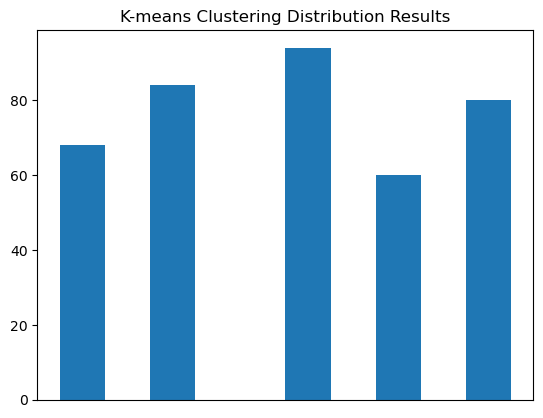

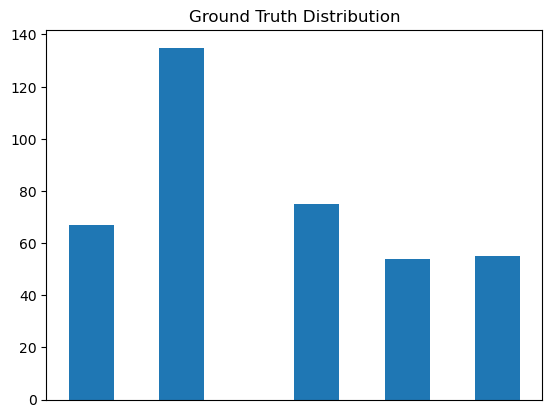

In [5]:
from lib.kmeans import Kmeans
import numpy as np
import matplotlib.pyplot as plt

k_means_cho = Kmeans(5, cho_df.to_numpy())
k_means_cho.run()
labels_cho = pd.DataFrame(k_means_cho.labels, columns=['Cluster ID'])
result_cho = pd.concat((cho_df,labels_cho), axis=1)

plt.hist(result_cho['Cluster ID'])
plt.title('K-means Clustering Distribution Results')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

plt.hist(cho_labels)
plt.title('Ground Truth Distribution')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [6]:
mean = np.mean(result_cho['Cluster ID'], axis=0)
sse = np.sum((result_cho['Cluster ID'] - mean) ** 2)
print(f'SSE for Cho dataset is {sse}')

SSE for Cho dataset is 736.0


Visualize the confusion matrix for the K-Means results.

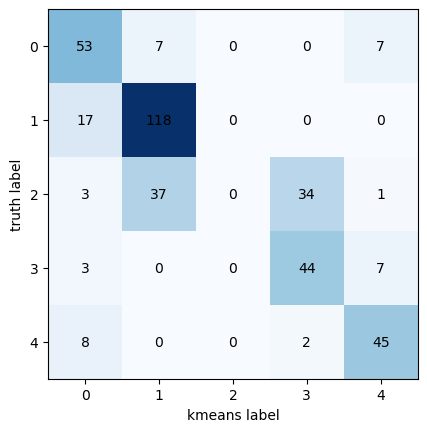

In [7]:
from sklearn.metrics import confusion_matrix

k_labels = result_cho['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(cho_labels==t)) for t in np.unique(cho_labels)]
    k_labels_matched[k_labels==k] = np.unique(cho_labels)[np.argmax(match_nums)]

cm = confusion_matrix(cho_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [8]:
print(f'K-means accuracy for Cho dataset: {np.sum(k_labels_matched == cho_labels)*100 / len(cho_labels)} %')

K-means accuracy for Cho dataset: 67.35751295336787 %


Visualize the K-Means results on 2-D PCA.

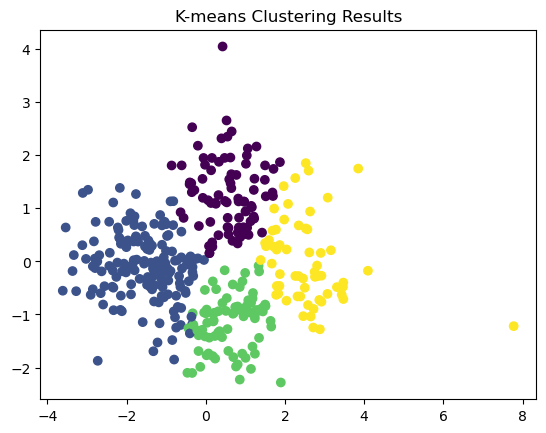

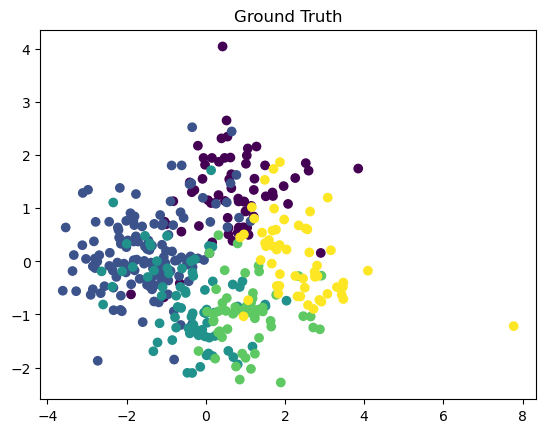

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(cho_df)
cho_df_2d = pca.transform(cho_df)

plt.scatter(cho_df_2d[:, 0], cho_df_2d[:, 1], c=k_labels_matched)
plt.title('K-means Clustering Results')
plt.show()
plt.scatter(cho_df_2d[:, 0], cho_df_2d[:, 1], c=cho_labels)
plt.title('Ground Truth')
plt.show()

# K-Means: Cho data set with normalization

Normalize the input Cho data

In [10]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
cho_norm = scaler.fit_transform(cho_df)
cho_df_norm = pd.DataFrame(cho_norm, columns=cho_df.columns)

Vizualize the normalized data set distribution range

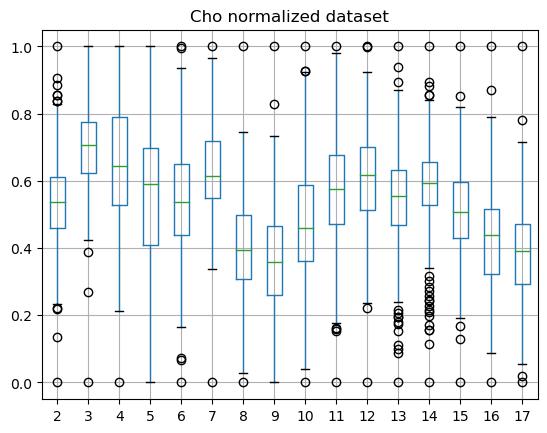

<Figure size 640x480 with 0 Axes>

In [11]:
cho_df_norm.boxplot()
plt.title('Cho normalized dataset')
plt.figure()
plt.show()

Perform K-Means on the normalized Cho data set and visualize the results with the ground truth labels.

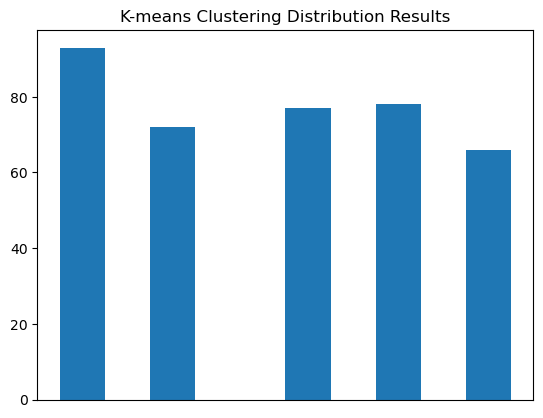

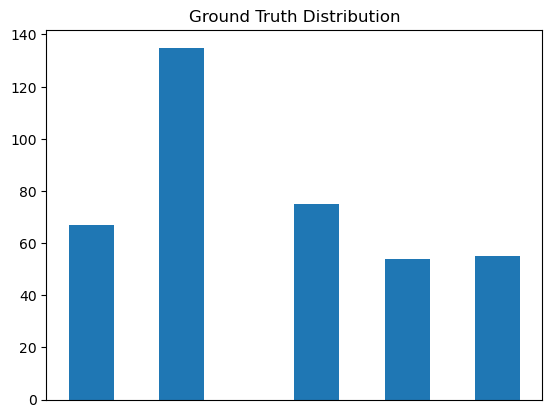

In [12]:
k_means_cho = Kmeans(5, cho_df_norm.to_numpy())
k_means_cho.run()
labels_cho = pd.DataFrame(k_means_cho.labels, columns=['Cluster ID'])
result_cho = pd.concat((cho_df_norm,labels_cho), axis=1)

plt.hist(result_cho['Cluster ID'])
plt.title('K-means Clustering Distribution Results')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

plt.hist(cho_labels)
plt.title('Ground Truth Distribution')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [13]:
mean = np.mean(result_cho['Cluster ID'], axis=0)
sse = np.sum((result_cho['Cluster ID'] - mean) ** 2)
print(f'SSE for Cho dataset with normalization is {sse}')

SSE for Cho dataset with normalization is 780.0310880829015


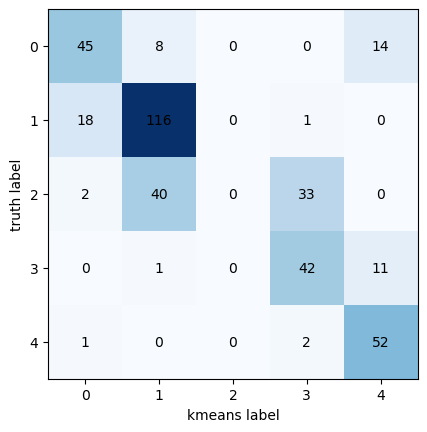

In [14]:
k_labels = result_cho['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(cho_labels==t)) for t in np.unique(cho_labels)]
    k_labels_matched[k_labels==k] = np.unique(cho_labels)[np.argmax(match_nums)]

cm = confusion_matrix(cho_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [15]:
print(f'K-means accuracy for Cho dataset with normalization: {np.sum(k_labels_matched == cho_labels)*100 / len(cho_labels)} %')

K-means accuracy for Cho dataset with normalization: 66.06217616580311 %


# K-Means: Iyer data set without noise and normalization

Perform K-Means on the Iyer data set and visualize the results with the ground truth labels.

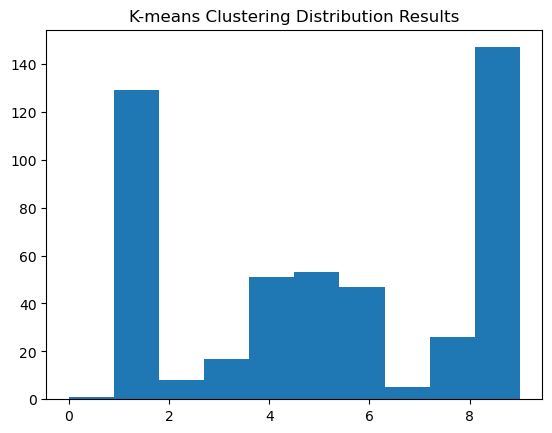

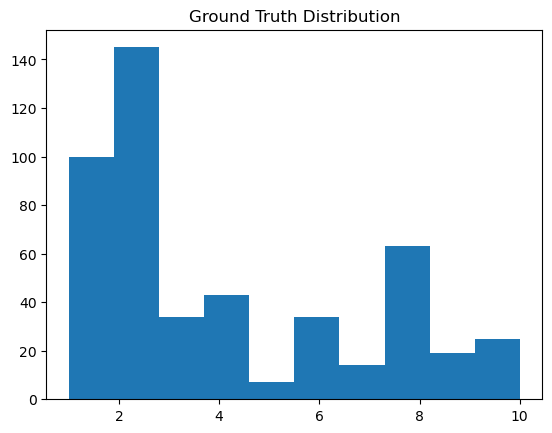

In [16]:
k_means_iyer = Kmeans(10, iyer_df.to_numpy())
k_means_iyer.run()
labels_iyer = pd.DataFrame(k_means_iyer.labels, columns=['Cluster ID'])
result_iyer = pd.concat((iyer_df,labels_iyer), axis=1)

plt.hist(result_iyer['Cluster ID'])
plt.title('K-means Clustering Distribution Results')
plt.show()

plt.hist(iyer_labels)
plt.title('Ground Truth Distribution')
plt.show()

In [17]:
mean = np.mean(result_iyer['Cluster ID'], axis=0)
sse = np.sum((result_iyer['Cluster ID'] - mean) ** 2)
print(f'SSE for Iyer dataset without normalization is {sse}')

SSE for Iyer dataset without normalization is 4915.130165289255


Visulize the confusion matrix for the K-Means results.

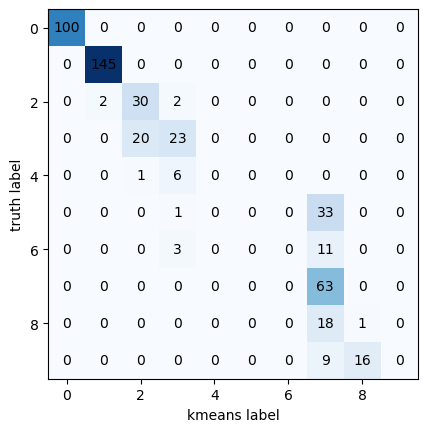

In [18]:
k_labels = labels_iyer['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(iyer_labels==t)) for t in np.unique(iyer_labels)]
    k_labels_matched[k_labels==k] = np.unique(iyer_labels)[np.argmax(match_nums)]

cm = confusion_matrix(iyer_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [19]:
print(f'K-means  accuracy for Iyer data:: {np.sum(k_labels_matched == iyer_labels)*100 / len(iyer_labels)} %')

K-means accuracy for Iyer accuracy: 74.79338842975207 %


Visualize the K-Means results on 2-D PCA.

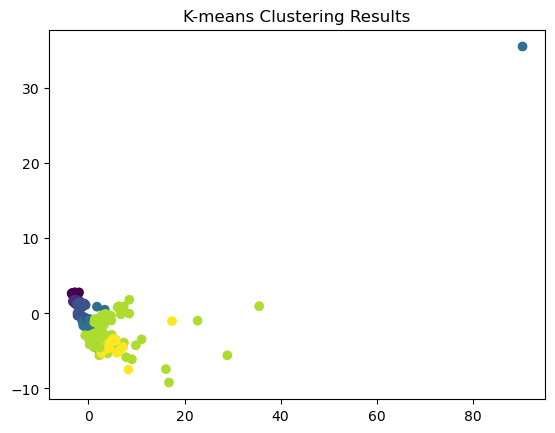

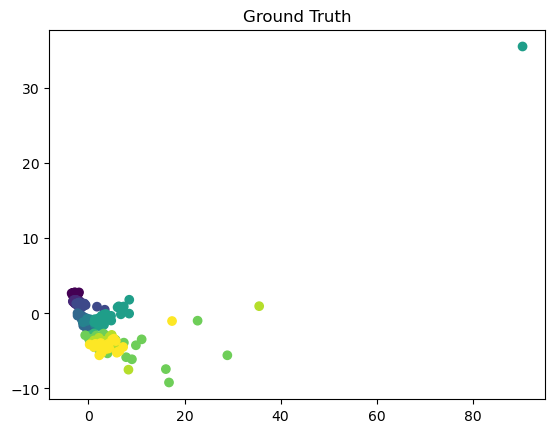

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iyer_df)
iyer_df_2d = pca.transform(iyer_df)

plt.scatter(iyer_df_2d[:, 0], iyer_df_2d[:, 1], c=k_labels_matched)
plt.title('K-means Clustering Results')
plt.show()
plt.scatter(iyer_df_2d[:, 0], iyer_df_2d[:, 1], c=iyer_labels)
plt.title('Ground Truth')
plt.show()

# K-Means: Iyer data set with normalization

Normalize the input Iyer data

In [21]:
scaler = preprocessing.MinMaxScaler()
iyer_norm = scaler.fit_transform(iyer_df)
iyer_df_norm = pd.DataFrame(iyer_norm, columns=iyer_df.columns)

Vizualize the normalized data set distribution range

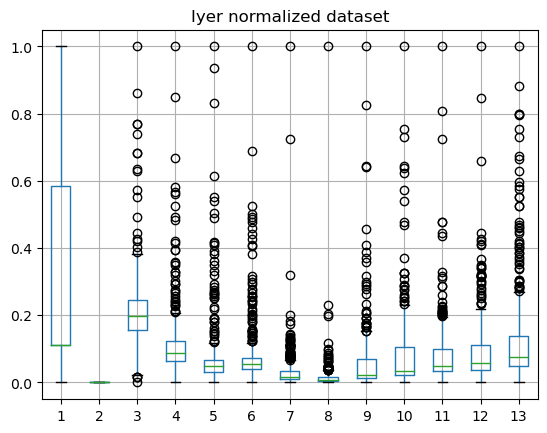

<Figure size 640x480 with 0 Axes>

In [22]:
iyer_df_norm.boxplot()
plt.title('Iyer normalized dataset')
plt.figure()
plt.show()

Perform K-Means on the normalized Iyer data set and visualize the results with the ground truth labels.

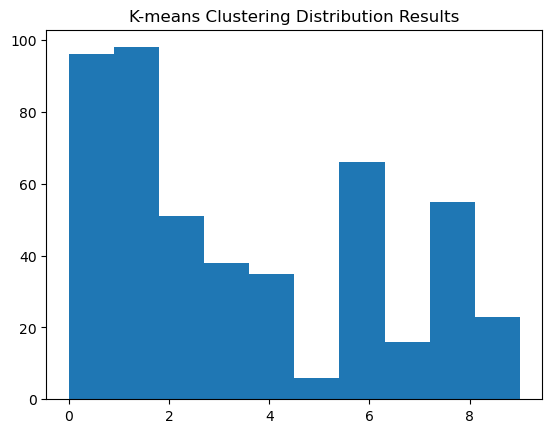

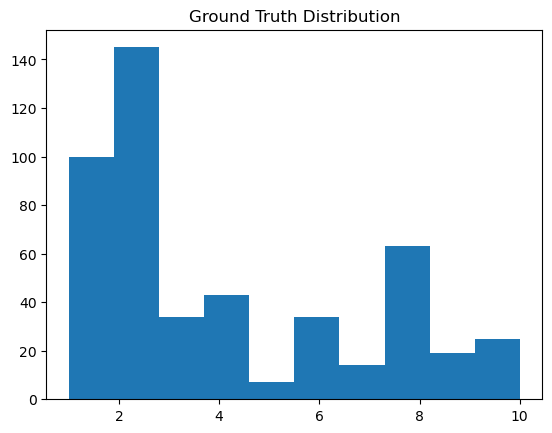

In [23]:
k_means_iyer = Kmeans(10, iyer_df_norm.to_numpy())
k_means_iyer.run()
labels_iyer = pd.DataFrame(k_means_iyer.labels, columns=['Cluster ID'])
result_iyer = pd.concat((iyer_df_norm,labels_iyer), axis=1)

plt.hist(result_iyer['Cluster ID'])
plt.title('K-means Clustering Distribution Results')
plt.show()

plt.hist(iyer_labels)
plt.title('Ground Truth Distribution')
plt.show()

In [24]:
mean = np.mean(result_iyer['Cluster ID'], axis=0)
sse = np.sum((result_iyer['Cluster ID'] - mean) ** 2)
print(f'SSE for Iyer dataset with normalization is {sse}')

SSE for Iyer dataset with normalization is 4346.75


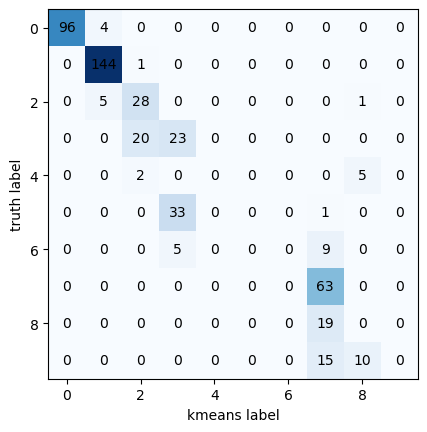

In [25]:
k_labels = labels_iyer['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(iyer_labels==t)) for t in np.unique(iyer_labels)]
    k_labels_matched[k_labels==k] = np.unique(iyer_labels)[np.argmax(match_nums)]

cm = confusion_matrix(iyer_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [26]:
print(f'K-means accuracy for Iyer dataset with normalization: {np.sum(k_labels_matched == iyer_labels)*100 / len(iyer_labels)} %')

K-means accuracy for Iyer dataset with normalization: 73.14049586776859 %


# K-Means: Iyer data set with noise

Extract the Iyer data with noise and labels. 

In [27]:
iyer_labels = iyer_raw_df.iloc[:, 1]
iyer_df = iyer_raw_df.iloc[:, 1:]

In [28]:
print(f'Number of distinct labels in Iyer dataset is {iyer_labels.nunique()}')

Number of distinct labels in Iyer dataset is 11


Perform K-Means on the Iyer data set and visualize the results with the ground truth labels.

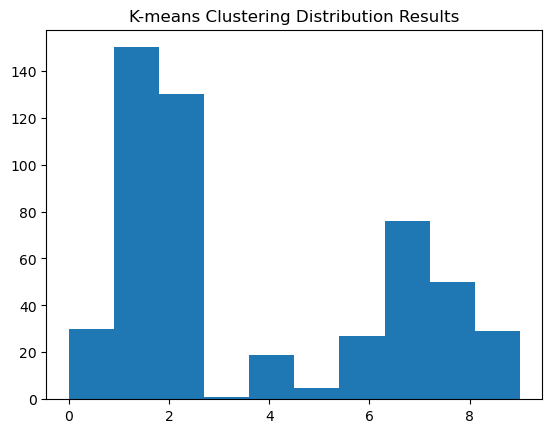

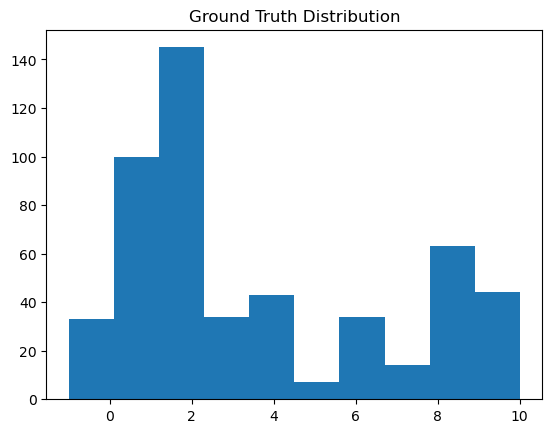

In [29]:
k_means_iyer = Kmeans(10, iyer_df.to_numpy())
k_means_iyer.run()
labels_iyer = pd.DataFrame(k_means_iyer.labels, columns=['Cluster ID'])
result_iyer = pd.concat((iyer_df,labels_iyer), axis=1)

plt.hist(result_iyer['Cluster ID'])
plt.title('K-means Clustering Distribution Results')
plt.show()

plt.hist(iyer_labels)
plt.title('Ground Truth Distribution')
plt.show()

In [30]:
mean = np.mean(result_iyer['Cluster ID'], axis=0)
sse = np.sum((result_iyer['Cluster ID'] - mean) ** 2)
print(f'SSE for Iyer dataset with noise is {sse}')

SSE for Iyer dataset with noise is 4596.402321083173


Visulize the confusion matrix for the K-Means results.

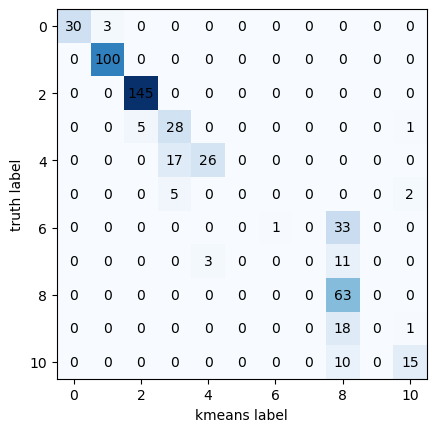

In [31]:
k_labels = labels_iyer['Cluster ID']
k_labels_matched = np.empty_like(k_labels)

for k in np.unique(k_labels):
    match_nums = [np.sum((k_labels==k)*(iyer_labels==t)) for t in np.unique(iyer_labels)]
    k_labels_matched[k_labels==k] = np.unique(iyer_labels)[np.argmax(match_nums)]

cm = confusion_matrix(iyer_labels, k_labels_matched)

plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

In [32]:
print(f'K-means  accuracy for Iyer data:: {np.sum(k_labels_matched == iyer_labels)*100 / len(iyer_labels)} %')

K-means accuracy for Iyer accuracy: 78.91682785299807 %
